# Energy generation Prediction

## Objective

The primary objective of this project is to analyze energy generation trends using data related to various fuel types. By examining the generation patterns, we aim to gain insights into the efficiency and consistency of energy sources such as hydroelectric power, helping stakeholders make informed decisions for sustainable energy planning. 

## Problem Statement

With the increasing demand for renewable energy sources, it is crucial to assess the performance and contribution of different fuel types to the overall energy grid. This project addresses the need to:
- Understand the hourly trends in energy generation.
- Evaluate the consistency of energy production from renewable sources like hydroelectric power.
- Identify potential opportunities for optimizing energy output and resource utilization.

## Data Description 

Below is a brief description of the data fields:

- **respondent**: The region or entity reporting the data.
- **respondent-name**: Full name of the respondent.
- **fueltype**: Code representing the type of fuel used.
- **type-name**: Full name of the fuel type.
- **value**: The amount of energy generated.
- **value-units**: Units of energy measurement.
- **period**: The timestamp for the recorded data.

The provided dataset focuses on hydroelectric energy generation in New York for January 2022-24 extracted from **eia.gov**, offers an opportunity to analyze trends and variations in production across different time intervals. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv("/home/karthikponna/kittu/Energy generation prediction project/Energy-Generation-Predictor-MLops/data/dataset/EnergyData.csv",index_col=[0],
                  parse_dates=[0])
data = data.sort_index()
data.head()

respondent respondent-name fueltype type-name  value  \
period                                                                     
2022-01-01 00:00:00         NY        New York      WAT     Hydro   3962   
2022-01-01 01:00:00         NY        New York      WAT     Hydro   3970   
2022-01-01 02:00:00         NY        New York      WAT     Hydro   3963   
2022-01-01 03:00:00         NY        New York      WAT     Hydro   3750   
2022-01-01 04:00:00         NY        New York      WAT     Hydro   3513   

                       value-units  
period                              
2022-01-01 00:00:00  megawatthours  
2022-01-01 01:00:00  megawatthours  
2022-01-01 02:00:00  megawatthours  
2022-01-01 03:00:00  megawatthours  
2022-01-01 04:00:00  megawatthours

In [3]:
data.tail()

respondent respondent-name fueltype type-name  value  \
period                                                                     
2024-11-30 20:00:00         NY        New York      WAT     Hydro   2972   
2024-11-30 21:00:00         NY        New York      WAT     Hydro   3387   
2024-11-30 22:00:00         NY        New York      WAT     Hydro   3591   
2024-11-30 23:00:00         NY        New York      WAT     Hydro   3630   
2024-12-01 00:00:00         NY        New York      WAT     Hydro   3590   

                       value-units  
period                              
2024-11-30 20:00:00  megawatthours  
2024-11-30 21:00:00  megawatthours  
2024-11-30 22:00:00  megawatthours  
2024-11-30 23:00:00  megawatthours  
2024-12-01 00:00:00  megawatthours

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25561 entries, 2022-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   respondent       25561 non-null  object
 1   respondent-name  25561 non-null  object
 2   fueltype         25561 non-null  object
 3   type-name        25561 non-null  object
 4   value            25561 non-null  int64 
 5   value-units      25561 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

value
count  25561.000000
mean    3036.591409
std      625.980099
min        0.000000
25%     2577.000000
50%     3106.000000
75%     3506.000000
max     5231.000000

In [6]:
print(f"Values in respondent: {data['respondent'].value_counts()}")
print(f"Values in respondent-name: {data['respondent-name'].value_counts()}")
print(f"Values in fueltype: {data['fueltype'].value_counts()}")
print(f"Values in type-name: {data['type-name'].value_counts()}")
print(f"Values in value-units: {data['value-units'].value_counts()}")

Values in respondent: respondent
NY    25561
Name: count, dtype: int64
Values in respondent-name: respondent-name
New York    25561
Name: count, dtype: int64
Values in fueltype: fueltype
WAT    25561
Name: count, dtype: int64
Values in type-name: type-name
Hydro    25561
Name: count, dtype: int64
Values in value-units: value-units
megawatthours    25561
Name: count, dtype: int64


## Data Insights

Based on the analysis of the dataset, the following insights were derived:

1. **Data Overview**:
   - The dataset contains **25,561 entries** spanning from `2022-01-01 00:00:00` to `2024-12-01 00:00:00`.
   - It records energy generation values measured in `megawatthours`.

2. **Statistical Summary**:
   - **Average Energy Generation**: The mean value of energy generation is approximately **3036.59 megawatthours**.
   - **Variation**: 
     - The standard deviation of **625.98 megawatthours** indicates moderate variability in energy generation over the time period.
     - Minimum value: **0 megawatthours** (indicating periods of no generation).
     - Maximum value: **5231 megawatthours** (indicating the peak generation observed).
   - **Distribution**:
     - 25% of the energy generation values fall below **2577 megawatthours**.
     - The median value (50th percentile) is **3106 megawatthours**, suggesting that half of the records show energy generation above this level.
     - 75% of the energy generation values are below **3506 megawatthours**, indicating that extreme high values are relatively rare.

3. **Columns Selected for Analysis**:
   - For simplicity and focused analysis, only the `period` and `value` columns are retained. These columns will allow us to analyze the temporal trends and variations in energy generation effectively.

4. **Potential Focus Areas**:
   - Identify trends in energy generation over time (e.g., seasonal or daily patterns).
   - Examine periods of no generation or peak generation for operational insights.
   - Evaluate the consistency of energy production to ensure reliability in supply.

By narrowing down the dataset to the most relevant columns and focusing on the key metrics, the analysis aims to uncover meaningful trends and actionable insights for energy planning and optimization.


In [10]:
px.line(data.index, x='period', y=data['value'],title='Energy generation in MW')

Insights from the Line Chart:

- Trend: Energy generation shows seasonal fluctuations between 2022 and 2024.
- Range: Values oscillate between 1000 MW and 5000 MW.
- Peak Periods: Notable peaks occur at consistent intervals.
- Anomaly: A sharp dip is observed in late 2024.
- Seasonality: Regular patterns suggest periodic behavior in energy generation.

In [ ]:
df = data['value']
df.head()

period
2022-01-01 00:00:00    3962
2022-01-01 01:00:00    3970
2022-01-01 02:00:00    3963
2022-01-01 03:00:00    3750
2022-01-01 04:00:00    3513
Name: value, dtype: int64

In [ ]:
print(type(df)) 
print(df.shape) 

<class 'pandas.core.series.Series'>
(25561,)


In [ ]:
px.histogram(df,x='value',nbins=500)

Insights from the Histogram:

- Range: Values span from approximately 0 to 5000.
- Shape: Data is right-skewed, with most values between 2000 and 4000.
- Peak: Highest frequency is between 3000 and 3500.
- Outliers: Few values below 1000 or above 4500.
- Variability: Data shows a smooth spread, indicating variability in the main range (2000–4000)

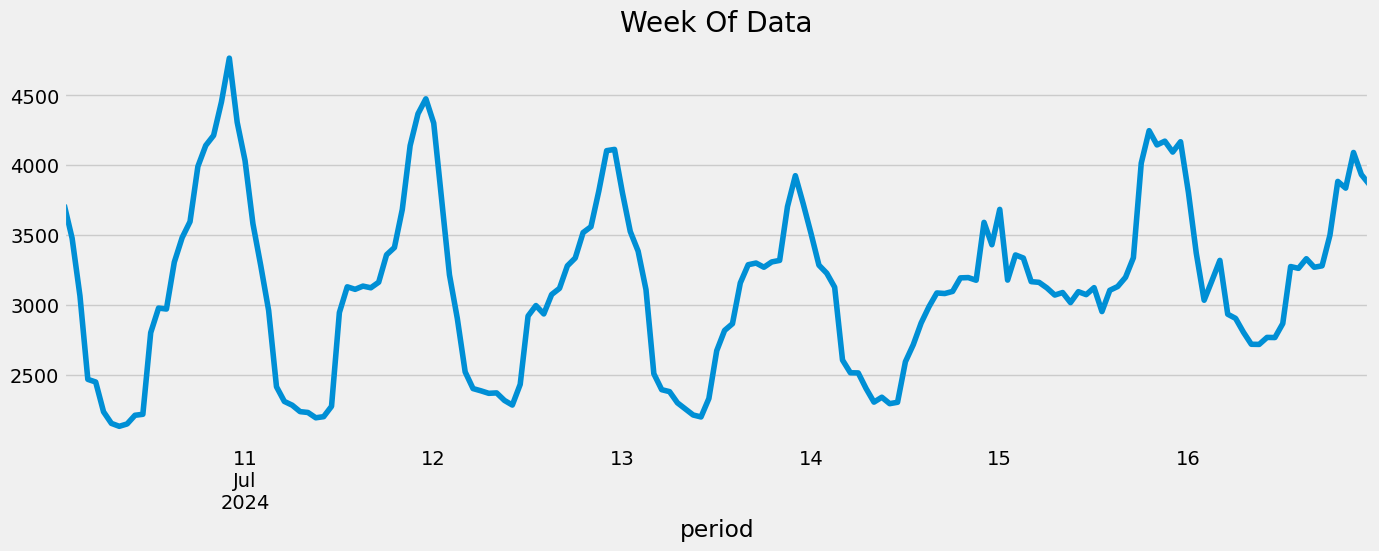

In [ ]:
df.loc[(df.index > '07-10-2024') & (df.index < '07-17-2024')]\
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()


Insights from the sample Weekly Data Graph:

- Cyclic Pattern: Energy generation exhibits a daily cyclic trend over the week.
- Peak Values: Highest generation (~4500 MW) occurs consistently each day.
- Low Points: Daily lows drop to ~2500 MW, likely during off-peak hours.
- Stable Behavior: Regular oscillations suggest predictable energy demand.

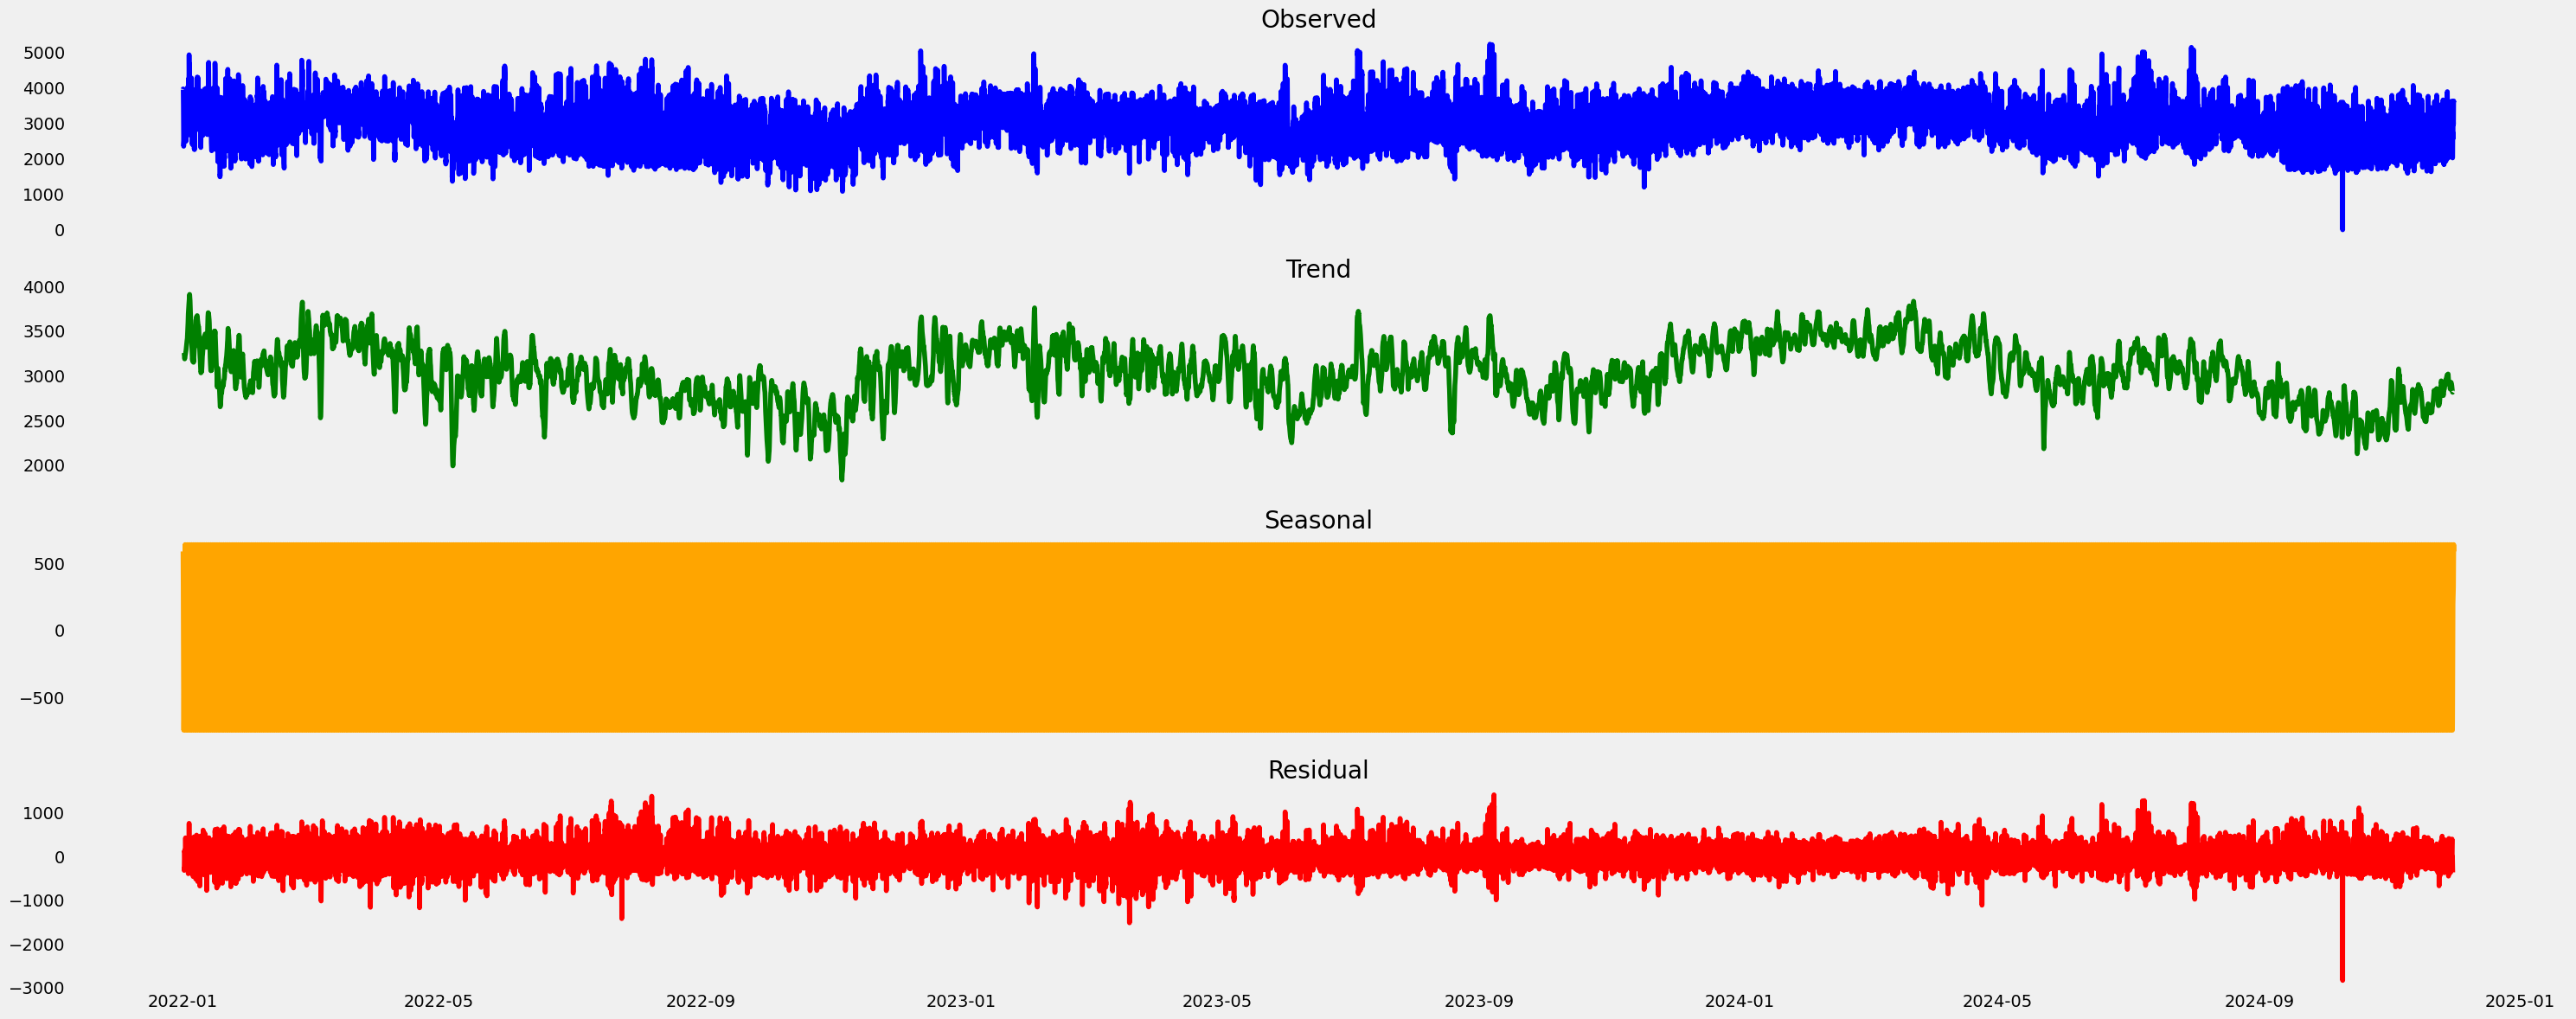

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose 

# Perform seasonal decomposition
results = seasonal_decompose(df , model='additive', period=24)

# Extract components
observed = results.observed
trend = results.trend
seasonal = results.seasonal
residual = results.resid
 
fig, axes = plt.subplots(4, 1, figsize=(30, 12), sharex=True)

# Observed component
axes[0].plot(df.index, observed, color='blue')
axes[0].set_title('Observed')
axes[0].grid()

# Trend component
axes[1].plot(df.index, trend, color='green')
axes[1].set_title('Trend')
axes[1].grid()

# Seasonal component
axes[2].plot(df.index, seasonal, color='orange')
axes[2].set_title('Seasonal')
axes[2].grid()

# Residual component
axes[3].plot(df.index, residual, color='red')
axes[3].set_title('Residual')
axes[3].grid()
 
plt.tight_layout() 
plt.show() 

**Insights from Seasonal Decomposition of Energy Generation in New York**

1. **Observed Component**:
   - The overall energy generation appears stable with occasional spikes and dips. These anomalies might be attributed to unexpected events or system failures.

2. **Trend Component**:
   - There is a gradual decline in energy generation over the period, suggesting potential long-term changes in energy production capacity or demand patterns.
   - Recent months show signs of stabilization or recovery in energy production.

3. **Seasonal Component**:
   - The seasonal pattern indicates a consistent periodic variation, likely driven by seasonal demand fluctuations (e.g., increased energy use during summer or winter months due to heating or cooling requirements).

4. **Residual Component**:
   - The residuals show random noise and outliers, reflecting deviations not explained by the trend or seasonality.
   - Significant outliers could represent unexpected disruptions or anomalies in energy generation.
 
- Investigate long-term factors affecting the trend, such as policy changes, infrastructure updates, or shifts in energy demand.
- Analyze seasonal peaks and troughs to optimize energy generation for expected demand surges.
- Address anomalies in the residuals by reviewing operational or external events.



**Check for Stationarity - (ADF)**

Augmented Dickey-Fuller(ADF) test, which is a statistical test used to determine whether a time series is stationary (i.e., its properties do not depend on time).

In [13]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test
result = adfuller(df)

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"{key}: {value}")
 
if result[1] <= 0.05:
    print("The df is stationary.")
else:
    print("The df is non-stationary. Differencing is required.") 

ADF Statistic: -10.090174802039218
p-value: 1.1276087999007714e-17
Critical Values:
1%: -3.430606348310086
5%: -2.8616532982918876
10%: -2.566830305350621
The df is stationary.


Since the ADF statistic is much smaller than the critical values, and the p-value is close to zero, we can reject the null hypothesis of the ADF test.

The null hypothesis states that the time series is non-stationary. Rejecting it implies that the series is stationary.

**Creating Time Series Features**

In [22]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = data.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week

    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(data, label='value')
data = pd.concat([X, y], axis=1)

In [23]:
data.head()

hour  dayofweek  quarter  month  year  dayofyear  \
period                                                                  
2022-01-01 00:00:00     0          5        1      1  2022          1   
2022-01-01 01:00:00     1          5        1      1  2022          1   
2022-01-01 02:00:00     2          5        1      1  2022          1   
2022-01-01 03:00:00     3          5        1      1  2022          1   
2022-01-01 04:00:00     4          5        1      1  2022          1   

                     dayofmonth  weekofyear   weekday  season  value  
period                                                                
2022-01-01 00:00:00           1          52  Saturday  Winter   3962  
2022-01-01 01:00:00           1          52  Saturday  Winter   3970  
2022-01-01 02:00:00           1          52  Saturday  Winter   3963  
2022-01-01 03:00:00           1          52  Saturday  Winter   3750  
2022-01-01 04:00:00           1          52  Saturday  Winter   3513

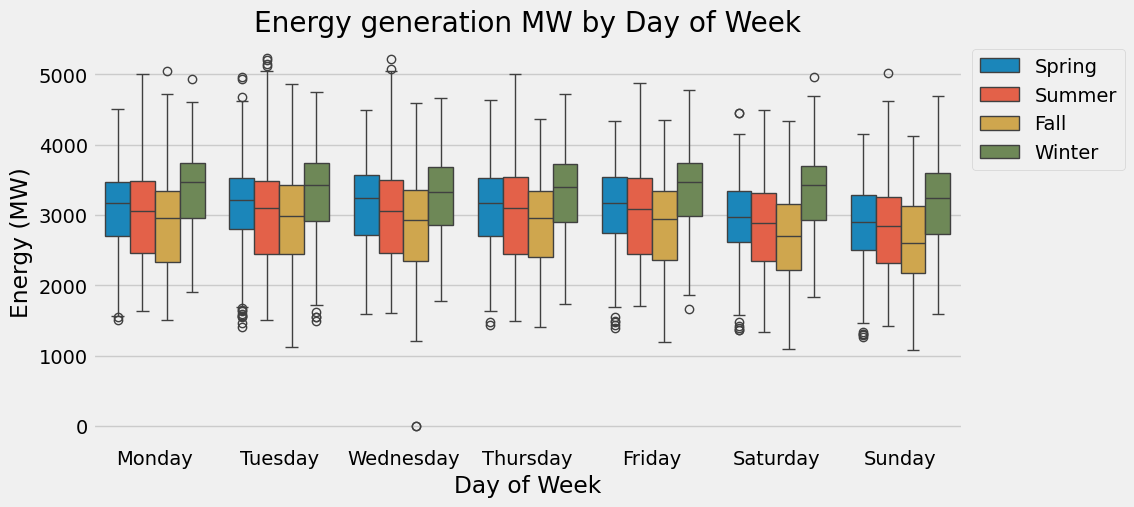

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data.dropna(),
            x='weekday',
            y='value',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Energy generation MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

**Insights on Energy Generation in New York by Day of Week and Season**

1. **Day of Week Trends**:
   - Energy generation is relatively consistent across all days of the week, with slight variations.
   - No significant spikes or dips are observed on specific days.

2. **Seasonal Variations**:
   - **Winter** typically exhibits higher energy generation compared to other seasons, likely due to increased heating demands.
   - **Summer** shows moderately high energy generation, likely driven by cooling needs.
   - **Spring** and **Fall** tend to have lower energy generation, reflecting moderate energy demands during these transitional seasons.

3. **Distribution and Variability**:
   - The energy generation shows a wide range with some outliers, particularly on weekdays.
   - Variability is higher in Winter and Summer compared to Spring and Fall, indicating season-dependent demand fluctuations.

4. **Weekend vs Weekday**:
   - Energy generation appears slightly more consistent on weekends compared to weekdays, likely due to reduced industrial and commercial activity.

**Conclusion**:
- The seasonal demand patterns align with expected heating and cooling needs.
- These trends can be used to optimize energy production and distribution.

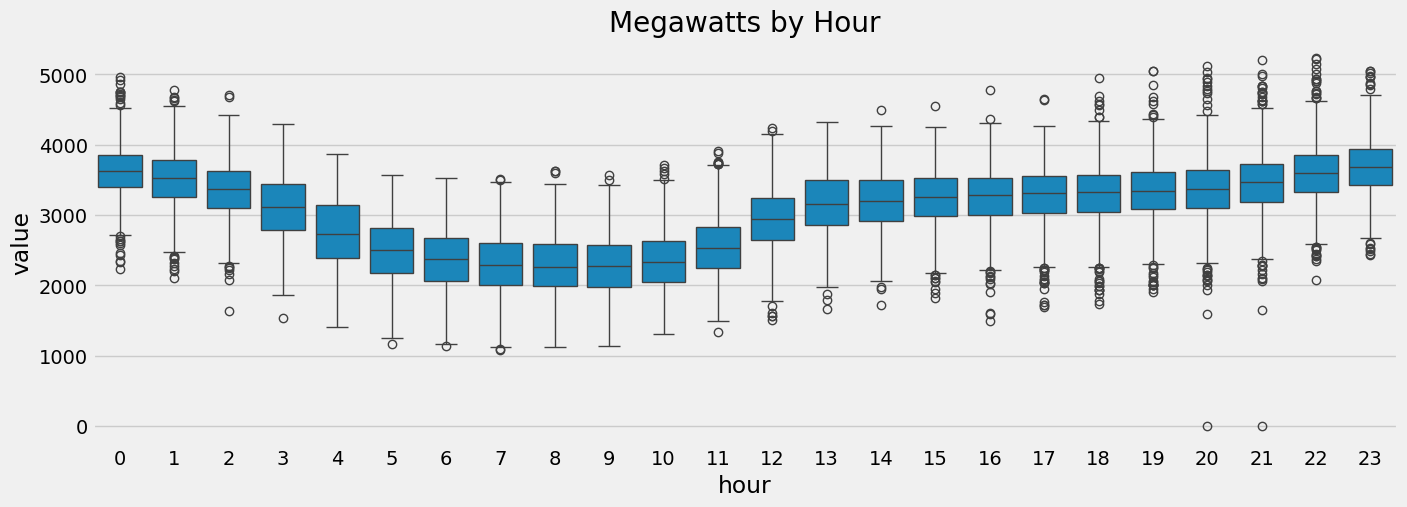

In [25]:
fig, ax = plt.subplots(figsize=(15, 5)) 
sns.boxplot(data=data, x='hour', y='value', ax=ax) 
ax.set_title('Megawatts by Hour') 
plt.show()

**Insights on Energy Generation in New York by Hour**

1. **Hourly Trends**:
   - Energy generation is highest during the early morning hours (00:00–03:00), likely due to heating or baseline industrial activities.
   - Energy generation gradually decreases to its lowest levels between 05:00 and 11:00 as demand subsides.

2. **Midday and Evening Recovery**:
   - Energy generation increases steadily from 12:00 and peaks again during evening hours (19:00–23:00), reflecting residential and commercial demand.

3. **Variability**:
   - The variability in energy generation is higher during early morning and evening hours, as evidenced by wider boxplots and the presence of outliers.
   - Midday energy generation (10:00–17:00) shows lower variability, suggesting more stable usage patterns during these hours.

4. **Outliers**:
   - Significant outliers are observed, particularly during the low-demand hours, possibly reflecting anomalies or unexpected changes in demand.

**Conclusion**:
- Energy generation patterns align with expected daily activity cycles, with peaks during early morning and evening hours and a dip during midday.
- These patterns can guide scheduling of energy production to optimize efficiency.


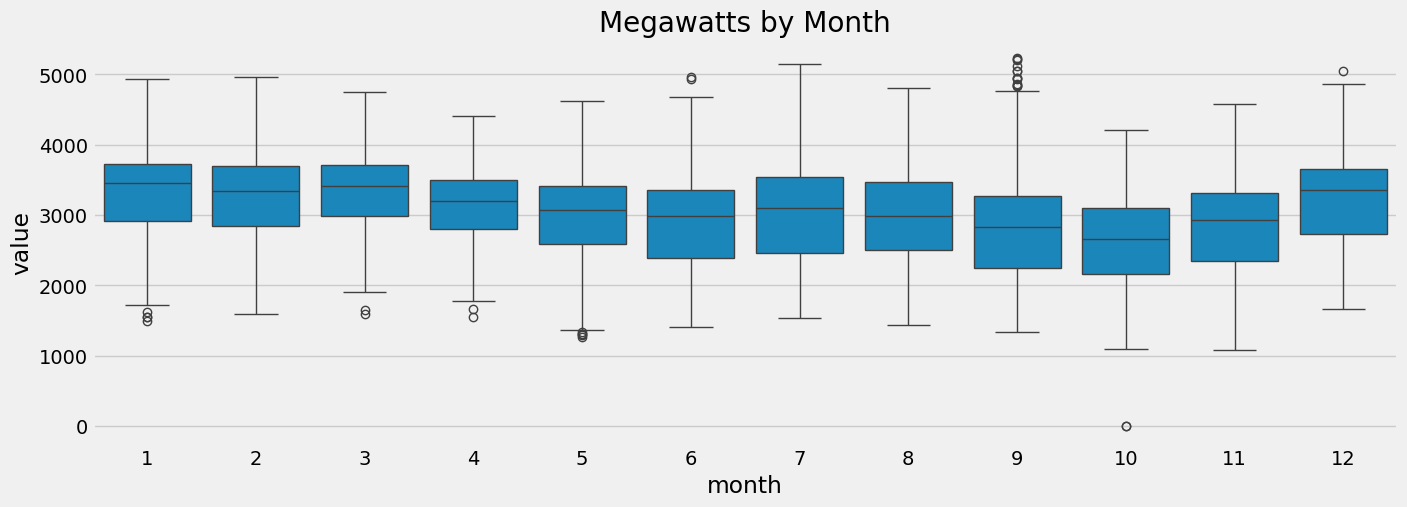

In [79]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x='month', y='value', ax=ax) 
ax.set_title('Megawatts by Month') 
plt.show()

**Insights on Energy Generation in New York by Month**

1. **Seasonal Variability**:
   - Energy generation remains relatively stable throughout the year, with median values ranging between 3000–4000 megawatts across all months.

2. **Outliers**:
   - Outliers are present in almost all months, indicating occasional extreme deviations from typical energy generation levels.
   - Notable outliers occur in:
     - Winter months (e.g., January and February with lower outliers).
     - Summer and early fall months (e.g., September with higher concentration of outliers).

3. **Peak Generation**:
   - July and August show slightly higher upper ranges of energy generation, possibly due to increased demand during summer.

4. **Lowest Variability**:
   - November exhibits the least variation in energy generation, suggesting more consistent production during this month.


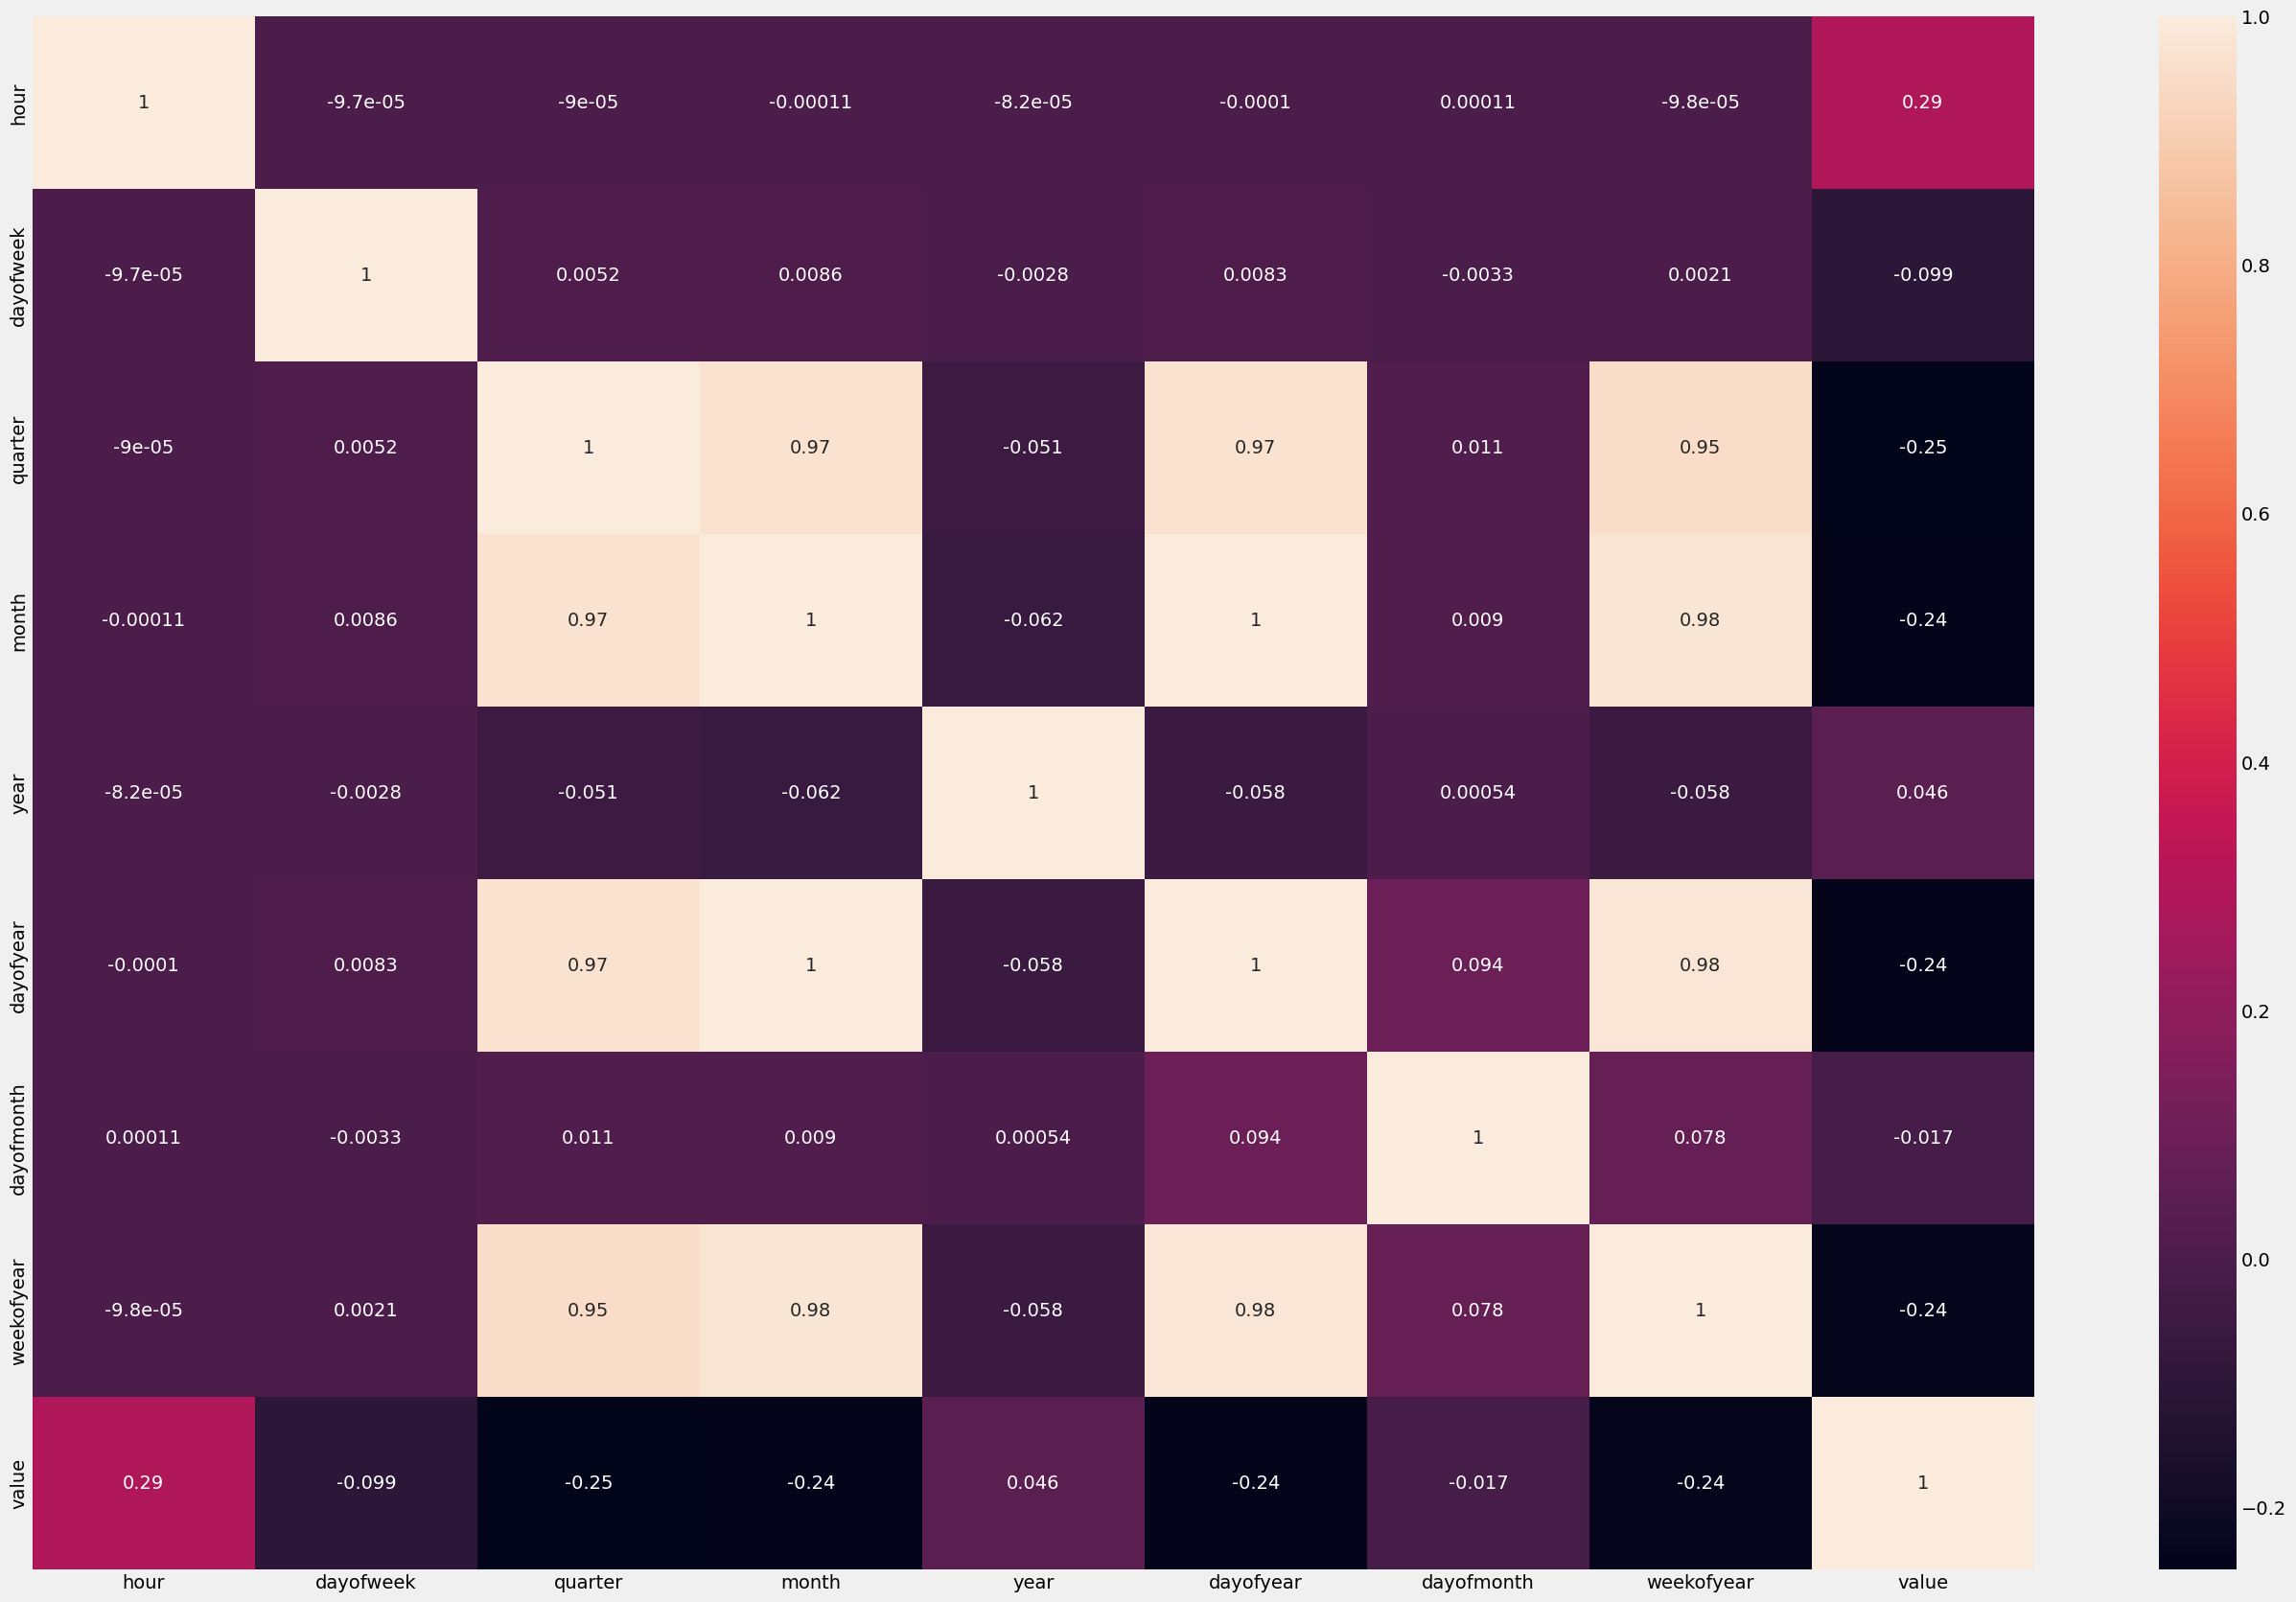

In [34]:
numeric_data = data.select_dtypes(include=['int32', 'int64', 'UInt32', 'float'])

# Correlation matrix
correlation_matrix = numeric_data.corr() 
plt.figure(figsize=(30,20))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

**Heatmap Insights:**

1. **Strong Correlation**:
   - `quarter`, `month`, `dayofyear`, and `weekofyear` exhibit high positive correlations with each other, likely due to their cyclical nature.
2. **Moderate Positive Correlation with `value`**:
   - The `hour` feature has a moderate positive correlation (`0.29`) with energy generation, indicating higher energy generation at specific times of the day.
3. **Weak/Negligible Correlation**:
   - Features like `dayofweek` and `year` show weak or negligible correlation with `value`, suggesting they might have less impact on predicting energy generation.


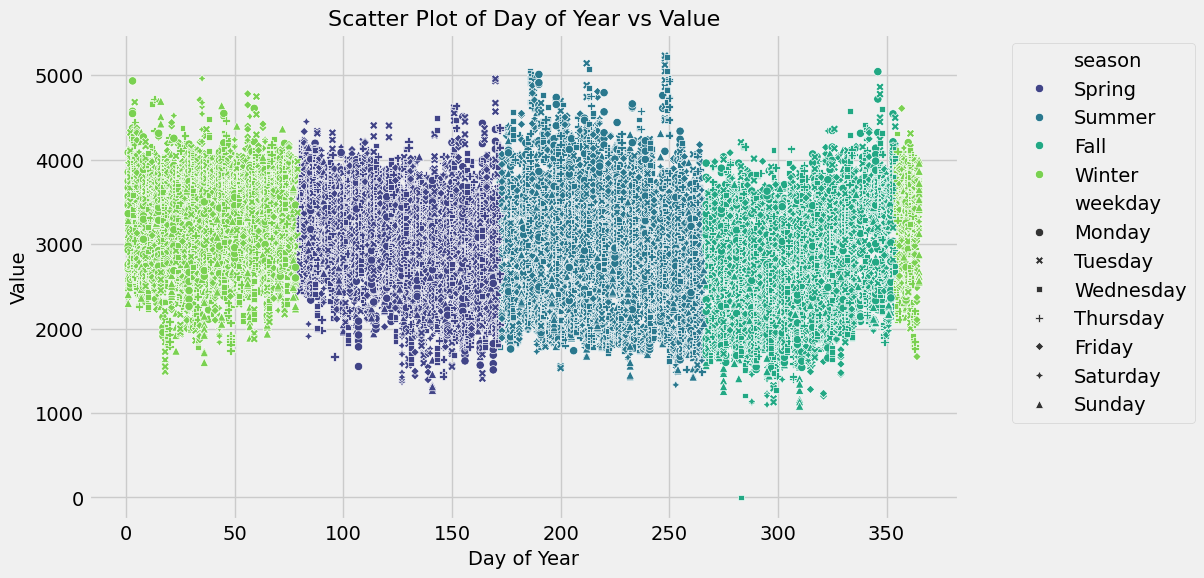

In [38]:
# Scatter plot
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=data, x='dayofyear', y='value', hue='season', style='weekday', palette='viridis') 
plt.title("Scatter Plot of Day of Year vs Value", fontsize=16)
plt.xlabel("Day of Year", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show() 

**Scatterplot Insights:**

1. **Seasonal Patterns**:
   - Energy generation varies across seasons (`Spring`, `Summer`, `Fall`, `Winter`), showing distinct clusters.
2. **Weekly Trends**:
   - The scatterplot suggests weekday variations in energy generation, likely influenced by differing weekday and weekend consumption patterns.
3. **Outliers**:
   - A few outliers are visible, indicating days with unusually high or low energy generation that may need further investigation or treatment. 


### Choosing the best model

In [2]:
metrics = {
    "Model": ["GRU", "GRU", "GRU", "LSTM", "LSTM", "LSTM", "CONV", "CONV", "CONV", "XGBOOST", "XGBOOST"],
    "Dataset": ["Train", "Validation", "Test", "Train", "Validation", "Test", "Train", "Validation", "Test", "Train", "Test"],
    "MAE": [152.7636, 155.0437, 147.7852, 140.7687, 132.6779, 136.5644, 319.0134, 378.1898, 309.2132, 23.5319, 30.6254],
    "MSE": [41492.37899, 39984.14321, 43759.33504, 35578.04014, 30640.24688, 36102.90328, 155800.72199, 207869.42212, 149409.02201, 1091.8503, 3800.5774],
    "RMSE": [203.6968, 199.9604, 209.1873, 188.6214, 175.0436, 190.0076, 394.7160, 455.9270, 386.5346, 33.0432, 61.6488],
    "R²": [0.8931, 0.8528, 0.8862, 0.9084, 0.8872, 0.9061, 0.5987, 0.2350, 0.6114, 0.9971, 0.9903]
} 
metrics_df = pd.DataFrame(metrics)
print(metrics_df) 

      Model     Dataset       MAE           MSE      RMSE      R²
0       GRU       Train  152.7636   41492.37899  203.6968  0.8931
1       GRU  Validation  155.0437   39984.14321  199.9604  0.8528
2       GRU        Test  147.7852   43759.33504  209.1873  0.8862
3      LSTM       Train  140.7687   35578.04014  188.6214  0.9084
4      LSTM  Validation  132.6779   30640.24688  175.0436  0.8872
5      LSTM        Test  136.5644   36102.90328  190.0076  0.9061
6      CONV       Train  319.0134  155800.72199  394.7160  0.5987
7      CONV  Validation  378.1898  207869.42212  455.9270  0.2350
8      CONV        Test  309.2132  149409.02201  386.5346  0.6114
9   XGBOOST       Train   23.5319    1091.85030   33.0432  0.9971
10  XGBOOST        Test   30.6254    3800.57740   61.6488  0.9903


 
Upon evaluating the performance metrics across different models, it's evident that XGBoost demonstrates signs of overfitting. While XGBoost achieves high accuracy on the training dataset (Train R²: 0.9971), its performance on the test dataset drops (Test R²: 0.9903), indicating it may not generalize well to unseen data. This is further supported by the large gap between its training and test RMSE values (Train RMSE: 33.0432 vs. Test RMSE: 61.6488).

In contrast, the LSTM model shows a more balanced performance with relatively smaller differences between training, validation, and test metrics. The LSTM's test R² score of 0.9061 suggests better generalization capability, with acceptable levels of Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Therefore, considering the generalization performance and stability across datasets, LSTM is chosen as the best model for further training and deployment.
